# Carnivore

### Description

This notebook compares the world's most popular meat production (beef, chicken, and swine/pig) to the world's population over time (from the year 1961 to the year 2021). The goal is to determine whether food production is keeping up with global population growth.

### Meat Production

The world's meat production data was gathered from the [Food and Agriculture Organization of the United Nations](https://www.fao.org/faostat/en/#data/QCL). The following image displays the constraints used to derive the CSV of beef, chicken, and swine production data:

![FAO Data Constraints](FAO_data_constraints.png "FAO Data Constraints")

### Population

The world's population data was gathered from the [United Nations' Data Portal of the Population Division](https://population.un.org/dataportal/data/indicators/49/locations/900/start/1961/end/2021/table/pivotbylocation). The following image displays the constraints used to derive the CSV of total human population:

![Population Data Constraints](population_data_constraints.png "Population Data Constraints")

In [1]:
# Create a dataframe from meat production CSV
import pandas as pd

meat_csv = "FAOSTAT_data_en_9-25-2023.csv"
meat = pd.read_csv(meat_csv)


In [2]:
# Normalize units of data (convert 1000 An -> An)
an_1000 = meat["Unit"].str.contains("1000")
meat.loc[an_1000, "Value"] *= 1000
meat.loc[an_1000, "Unit"] = "An"


In [3]:
# Create beef, chicken, and swine masks
beef = meat["Item"].str.contains("Cattle")
chicken = meat["Item"].str.contains("Chicken")
swine = meat["Item"].str.contains("Swine")

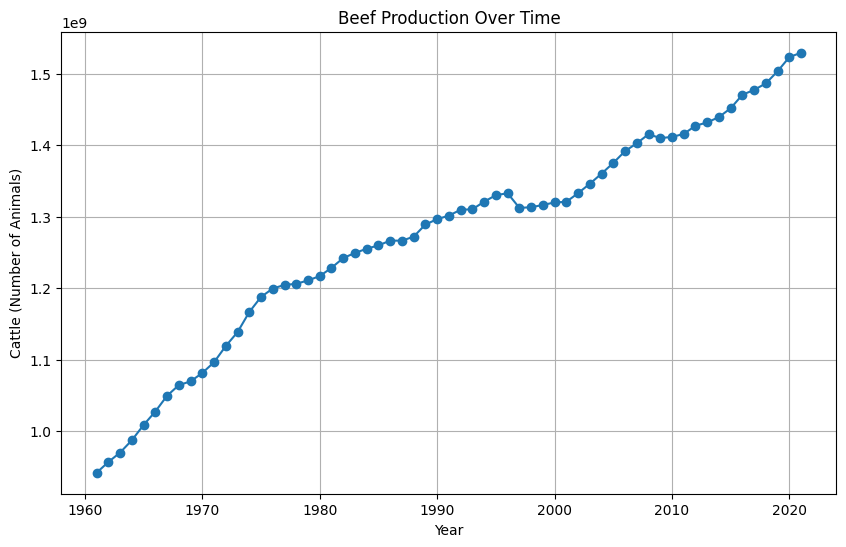

In [4]:
# Graph beef production over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(meat.loc[beef,"Year"], meat.loc[beef, "Value"], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Cattle (Number of Animals)")
plt.title("Beef Production Over Time")

plt.grid(True)
plt.show()

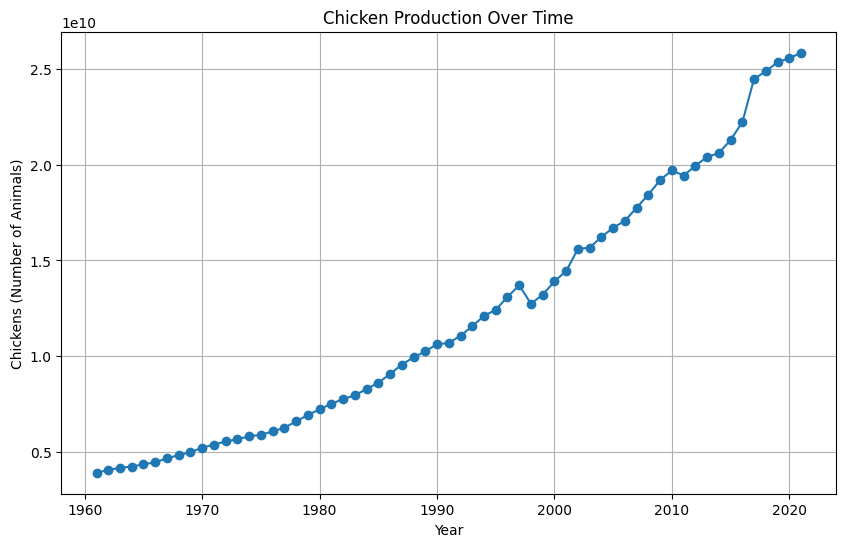

In [5]:
# Graph chicken production over time
plt.figure(figsize=(10, 6))
plt.plot(meat.loc[chicken, "Year"], meat.loc[chicken, "Value"], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Chickens (Number of Animals)")
plt.title("Chicken Production Over Time")

plt.grid(True)
plt.show()

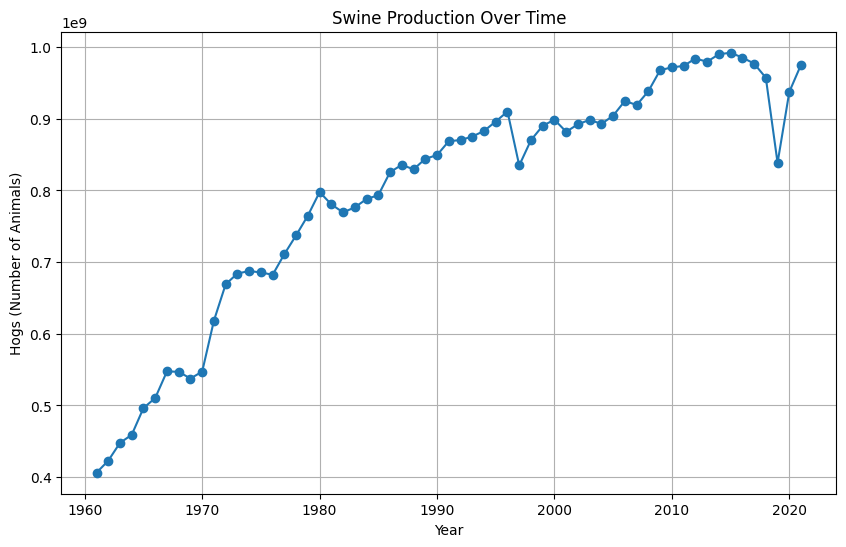

In [6]:
# Graph swine production over time
plt.figure(figsize=(10, 6))
plt.plot(meat.loc[swine, "Year"], meat.loc[swine, "Value"], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Hogs (Number of Animals)")
plt.title("Swine Production Over Time")

plt.grid(True)
plt.show()

In [7]:
# Create a dataframe from world population CSV
pop_csv = "unpopulation_dataportal_20230925160013.csv"
pop = pd.read_csv(pop_csv)

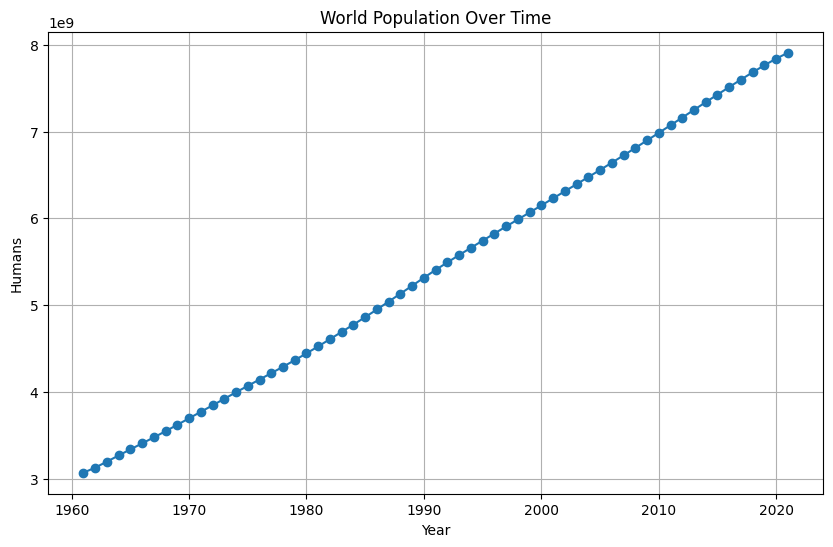

In [8]:
# Graph world population over time
plt.figure(figsize=(10, 6))
plt.plot(pop["Time"], pop["Value"], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Humans")
plt.title("World Population Over Time")

plt.grid(True)
plt.show()

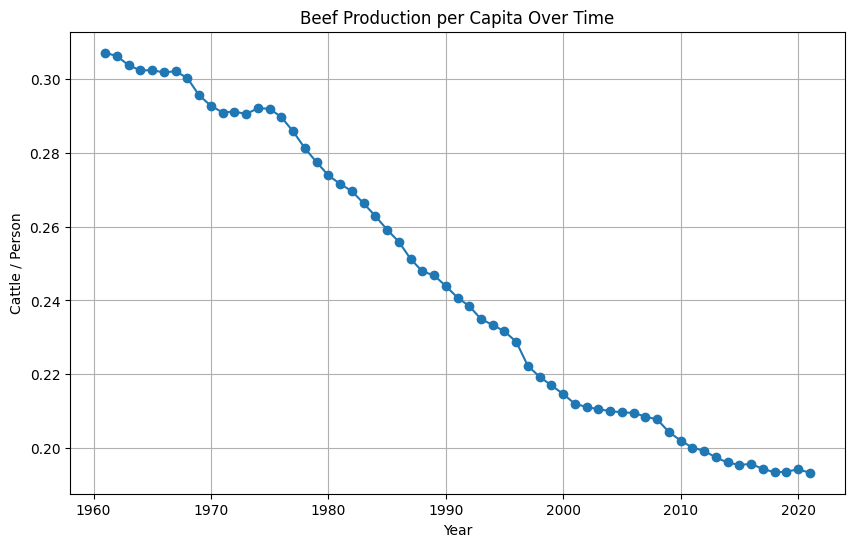

In [9]:
# Graph beef production per capita over time
beef_pc = meat[beef].copy()
beef_pc["Value"] = beef_pc["Value"].divide(pop["Value"])

plt.figure(figsize=(10, 6))
plt.plot(pop["Time"], beef_pc["Value"], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Cattle / Person")
plt.title("Beef Production per Capita Over Time")

plt.grid(True)
plt.show()


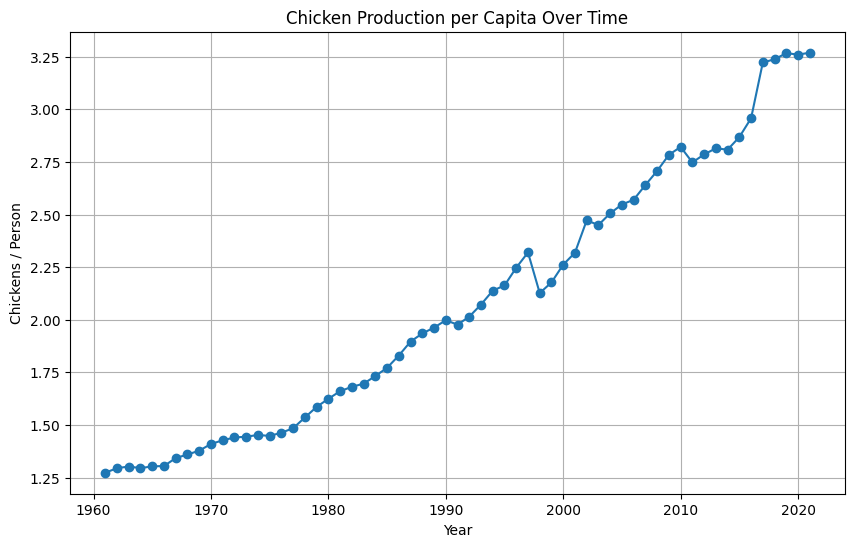

In [10]:
# Graph chicken production per capita over time
chicken_pc = meat[chicken].copy().reset_index()
chicken_pc["Value"] = chicken_pc["Value"].divide(pop["Value"])

plt.figure(figsize=(10, 6))
plt.plot(pop["Time"], chicken_pc["Value"], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Chickens / Person")
plt.title("Chicken Production per Capita Over Time")

plt.grid(True)
plt.show()

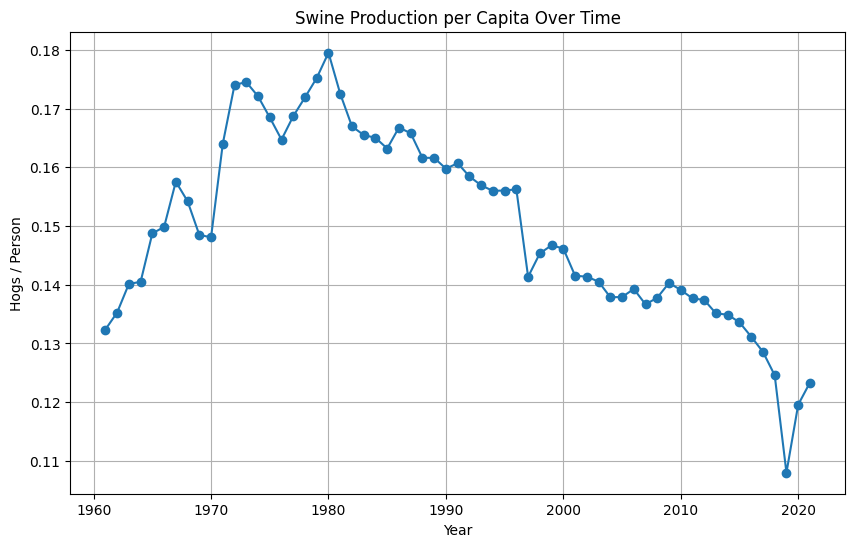

In [11]:
# Graph swine production per capita over time
swine_pc = meat[swine].copy().reset_index()
swine_pc["Value"] = swine_pc["Value"].divide(pop["Value"])

plt.figure(figsize=(10, 6))
plt.plot(pop["Time"], swine_pc["Value"], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Hogs / Person")
plt.title("Swine Production per Capita Over Time")

plt.grid(True)
plt.show()

In [12]:
# kcal per slaughtered animal
kcal_per_cow = 430e3 # https://www.lifebygeek.com/2012/11/03/how-much-energy-is-in-a-cow/#:~:text=This%20means%20that%20our%20cow,for%20nearly%20half%20a%20year!
kcal_per_chicken = 5 * (16 / 3.5) * 165 # https://extension.umn.edu/save-money-food/buying-animals-meat-processing#:~:text=A%20typical%20broiler%20chicken%20with,to%205%20pounds%20of%20meat; https://www.medicalnewstoday.com/articles/326767#:~:text=The%20USDA%20itemize%20a%20typical,31%20grams%20(g)%20of%20protein
kcal_per_hog = 285 * 0.57 * (16 / 3) * 200 # https://osbornelivestockequipment.com/news/average-market-pig-weight/#:~:text=At%20the%20end%20of%20the,is%20the%20optimum%20market%20weight; https://ag.ok.gov/wp-content/uploads/2020/11/HOW-MUCH-MEAT-BROCHURE-HOG-MEAT.pdf; https://www.fsis.usda.gov/sites/default/files/import/Pork_Lamb_Nutrition_Facts.pdf

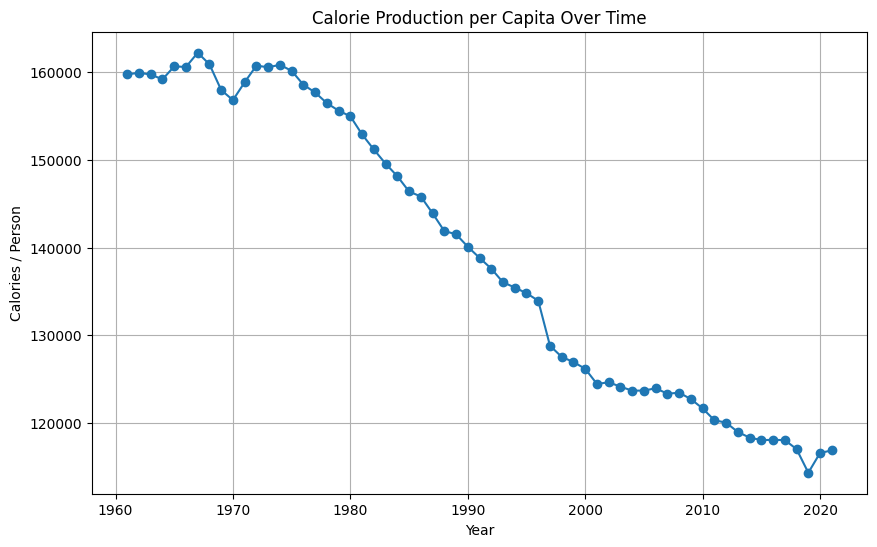

In [13]:
# Graph calorie production per capita over time
beef_pc["Value"] *= kcal_per_cow
chicken_pc["Value"] *= kcal_per_chicken
swine_pc["Value"] *= kcal_per_hog

kcal_pc = beef_pc["Value"] + chicken_pc["Value"] + swine_pc["Value"]

plt.figure(figsize=(10, 6))
plt.plot(pop["Time"], kcal_pc, marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Calories / Person")
plt.title("Calorie Production per Capita Over Time")

plt.grid(True)
plt.show()